#Generate dataset

In [ ]:
import random
import time
import threading
import multiprocessing

In [ ]:
sizes = [1_000*(10**x)*i  for x in range(5) for i in [1,6]][:-1]                        # Create size for datasets
datasets = [[random.randint(1, 1_000_000_000) for _ in range(size)] for size in sizes]  # Generate datasets randomly

# Merge Function
  

In [ ]:
def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])
    return result

#Traditional Merge Sort

In [ ]:
def traditional_merge_sort(data):
    if len(data) <= 1:
      return data

    mid = len(data) // 2
    left = data[:mid]
    right = data[mid:]

    left = traditional_merge_sort(left)
    right = traditional_merge_sort(right)
    return merge(left, right)

# PARALLEL QUICK-MERGE SORT

In [ ]:
def parallel_merge_sort(arr, process_count):
    # Bắt đầu đếm thời gian sắp xếp
    start = time.time()
    if len(arr) <= 1:
        return arr

    # Tạo các list chunks lưu các mảng con chunk được chia ra từ arr
    chunk_size = len(arr) // process_count
    chunks = [arr[i:i+chunk_size] for i in range(0, len(arr), chunk_size)]

    # Sắp xếp độc lập các chunk trong list chunks bằng hàm sorted() của python
    with multiprocessing.Pool(process_count) as pool:
        sorted_chunks = pool.map(sorted, chunks)

    # Merge các chunk đã sắp xếp trong list sorted_chunks
    sorted_arr = merge(*sorted_chunks)

    # Kết thúc bộ đếm thời gian và sao lưu thời gian sắp xếp vào biến PMS_time
    PMS_time = time.time() - start

    # Trả về mảng đã sắp xếp và thời gian thực hiện thuật toán sắp xếp song song
    return sorted_arr, PMS_time

#Compare results

In [ ]:
# Tạo list lưu lại thời gian sắp xếp của thuật toán truyền thống và thuật toán song song
time_list = {"Traditional MS" : [], "Parallel MS" :[]}


# Duyệt qua các bộ dữ liệu và thực hiện thuật toán sắp xếp
for dataset in datasets:

  # In kích thước của bộ dữ liệu
  print(f"Size = {len(dataset)}")


  # Tính toán thời gian sắp xếp của thuật toán truyèn thống
  start = time.time()
  TMS_sorted_data = traditional_merge_sort(dataset.copy())
  TMS_time = time.time() - start

  # Kiểm tra bộ dữ liệu đã sắp xếp
  assert TMS_sorted_data == sorted(dataset.copy())

  # Lưu lại thời gian thực hiện thuật toán
  time_list["Traditional MS"].append(TMS_time)

  # In ra kết quả
  print(f"Traditional Merge Sort Time: {TMS_time:.6f} seconds")

  # Tính toán thời gian sắp xếp của thuật toán song song với số process là 2
  PMS_sorted_arr,parallel_time = parallel_merge_sort(dataset.copy(), 2)

  # Kiểm tra bộ dữ liệu đã sắp xếp
  assert PMS_sorted_arr == sorted(dataset.copy())

  # Lưu lại thời gian thực hiện thuật toán
  time_list["Parallel MS"].append(parallel_time)

  # In ra kết quả
  print(f"Parallel Merge Sort Times: {parallel_time:.6f} seconds\n")




Size = 1000
Traditional Merge Sort Time: 0.007036 seconds
Parallel Merge Sort Times: 0.139084 seconds

Size = 6000
Traditional Merge Sort Time: 0.031610 seconds
Parallel Merge Sort Times: 0.090787 seconds

Size = 10000
Traditional Merge Sort Time: 0.045451 seconds
Parallel Merge Sort Times: 0.097006 seconds

Size = 60000
Traditional Merge Sort Time: 0.331449 seconds
Parallel Merge Sort Times: 0.133076 seconds

Size = 100000
Traditional Merge Sort Time: 0.596950 seconds
Parallel Merge Sort Times: 0.155604 seconds

Size = 600000
Traditional Merge Sort Time: 5.605855 seconds
Parallel Merge Sort Times: 0.596374 seconds

Size = 1000000
Traditional Merge Sort Time: 7.305054 seconds
Parallel Merge Sort Times: 1.626063 seconds

Size = 6000000
Traditional Merge Sort Time: 58.060172 seconds
Parallel Merge Sort Times: 6.144167 seconds

Size = 10000000
Traditional Merge Sort Time: 103.568086 seconds
Parallel Merge Sort Times: 11.216323 seconds





# BIỂU DIỄN BẰNG BIỂU ĐỒ :



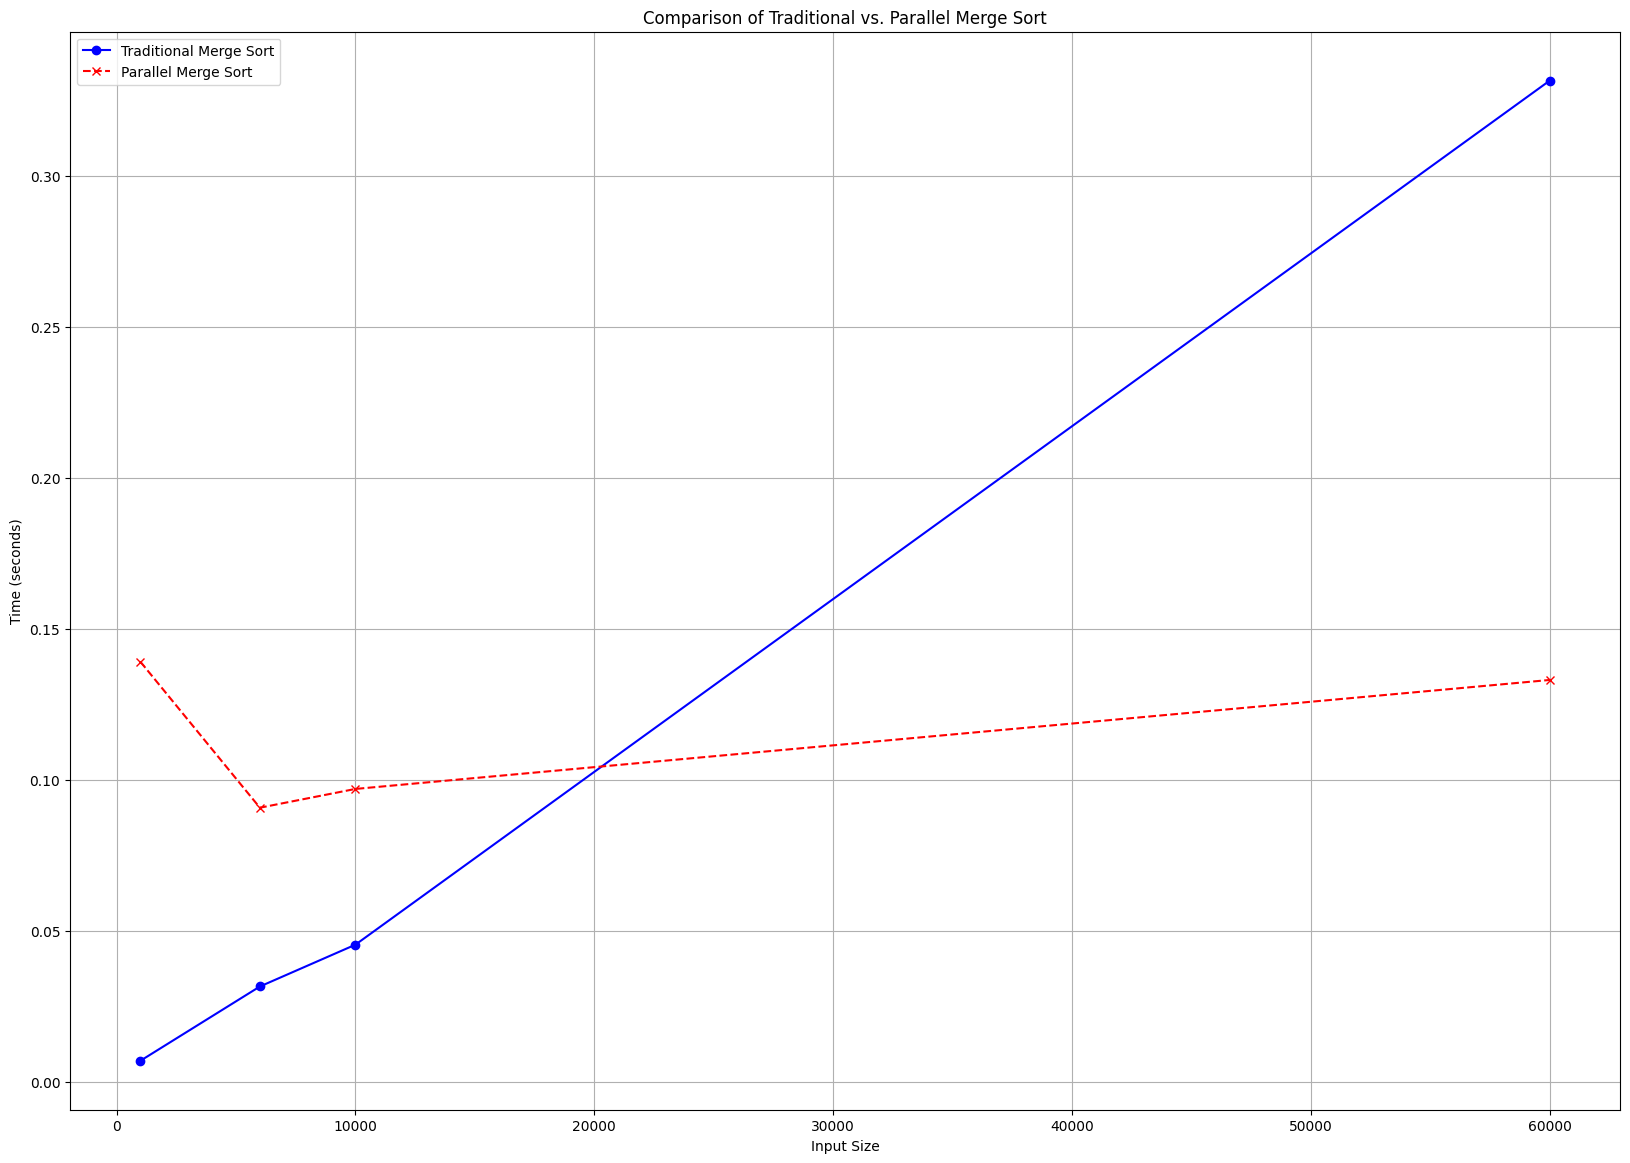

In [ ]:
import matplotlib.pyplot as plt

# Tạo biến lưu thời gian sắp xếp của từng thuật toán

traditional_merge_sort_times = time_list['Traditional MS'][:-5]
parallel_merge_sort_times = time_list['Parallel MS'][:-5]

plt.figure(figsize=(20, 14))

# Tạo biểu đồ Traditional Merge Sort
plt.plot(sizes[:-5], traditional_merge_sort_times, label='Traditional Merge Sort', marker='o', linestyle='-', color='blue')

# Tạo biểu đồ Parallel Merge Sort
plt.plot(sizes[:-5], parallel_merge_sort_times, label='Parallel Merge Sort', marker='x', linestyle='--', color='red')

# Tạo nhãn và tiêu đề
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Traditional vs. Parallel Merge Sort')

# Add a legend
plt.legend()

# Biểu diễn dữ liệu
plt.grid(True)
plt.show()




# NHẬN XÉT:


>  Đối với bộ dữ liệu có **kích thước lớn** tốc độ sắp xếp của thuật toán song song **tốt hơn** nhiều so với thuật toán truyền thống

